# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for bs4 from https://files.pythonhosted.org/packages/51/bb/bf7aab772a159614954d84aa832c129624ba6c32faa559dfb200a534e50b/bs4-0.0.2-py2.py3-none-any.whl.metadata
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np


## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())


<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
urls=[]
for a in soup.find_all('a',class_="title-list-grid__item--link"):
     urls.append("https://www.justwatch.com"+a.get('href'))
urls

['https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/family-star',
 'https://www.justwatch.com/in/movie/black-magic-2024',
 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/yodha-2022',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.justwatch.com/in/movie/amar-singh-chamkila',
 'https://www.justwatch.com/in/movie/kung-fu-panda-4',
 'https://w

In [ ]:
#Extracting all website of links above
def scrapping(i,n):
    soup_list=[]
    # we have list of 100 URLs since we may be blocked by the API. So I am going to scrap and append the the list of movie Genres
    # in parts.
    # first part contains 30 Genres.
    for i in range(i,n):
        # Specifying the URL from which movies related data will be fetched
        urlm=urls[i]

        # Sending an HTTP GET request to the URL
        page=requests.get(urlm)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_list.append(BeautifulSoup(page.text,'html.parser'))
        print('done')
    return soup_list

In [ ]:
import time
new_soup = scrapping(0,30)
time.sleep(300)
new_soup2=scrapping(30,60)
time.sleep(300)
new_soup3=scrapping(60,90)
time.sleep(300)
new_soup4=scrapping(90,100)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
soup_list=[]
soup_list.extend(new_soup)
soup_list.extend(new_soup2)
soup_list.extend(new_soup3)
soup_list.extend(new_soup4)

print(len(soup_list))

100


In [ ]:
print(soup_list.count(None))

0


## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
# MOVIE TITLES
ul=[]
for i in range(100):
    h_tags=soup_list[i].find('h1')
    try:
        temp=h_tags.get_text()
        ul.append(temp.strip())
        print(temp)
    except:
        print(None)
        ul.append(None)

 Laapataa Ladies 
 Article 370 
 Premalu 
 Manjummel Boys 
 Dune: Part Two 
 Family Star 
 Shaitaan 
 Teri Baaton Mein Aisa Uljha Jiya 
 Aavesham 
 Crew 
 Oppenheimer 
 Yodha 
 Hanu-Man 
 Anyone But You 
 Monkey Man 
 Godzilla x Kong: The New Empire 
 Amar Singh Chamkila 
 Kung Fu Panda 4 
 Madgaon Express 
 Dune 
 Tillu Square 
 Animal 
 The Beekeeper 
 777 Charlie 
 Anatomy of a Fall 
 12th Fail 
 Godzilla Minus One 
 Gaami 
 The Idea of You 
 Fighter 
 DJ Tillu 
 Kampon 
 Salaar 
 Bramayugam 
 365 Days 
 Crakk: Jeetega... Toh Jiyegaa 
 Hereditary 
 Poor Things 
 Sam Bahadur 
 Harry Potter and the Philosopher's Stone 
 Speak No Evil 
 The Raid 
 Rebel Moon - Part Two: The Scargiver 
 Bade Miyan Chote Miyan 
 Wild Tales 
 Kung Fu Panda 
 Madame Web 
 Silence 2: The Night Owl Bar Shootout 
 Anchakkallakokkan 
 Rise of the Planet of the Apes 
 Aquaman and the Lost Kingdom 
 Challengers 
 Maidaan 
 Migration 
 All India Rank 
 The Goat Life 
 Om Bheem Bush 
 The Kerala Story 
 Hatching 


In [ ]:
#checking if resived None value or not
print(ul)
print(len(ul))
print(ul.count(None))

['Laapataa Ladies', 'Article 370', 'Premalu', 'Manjummel Boys', 'Dune: Part Two', 'Family Star', 'Shaitaan', 'Teri Baaton Mein Aisa Uljha Jiya', 'Aavesham', 'Crew', 'Oppenheimer', 'Yodha', 'Hanu-Man', 'Anyone But You', 'Monkey Man', 'Godzilla x Kong: The New Empire', 'Amar Singh Chamkila', 'Kung Fu Panda 4', 'Madgaon Express', 'Dune', 'Tillu Square', 'Animal', 'The Beekeeper', '777 Charlie', 'Anatomy of a Fall', '12th Fail', 'Godzilla Minus One', 'Gaami', 'The Idea of You', 'Fighter', 'DJ Tillu', 'Kampon', 'Salaar', 'Bramayugam', '365 Days', 'Crakk: Jeetega... Toh Jiyegaa', 'Hereditary', 'Poor Things', 'Sam Bahadur', "Harry Potter and the Philosopher's Stone", 'Speak No Evil', 'The Raid', 'Rebel Moon - Part Two: The Scargiver', 'Bade Miyan Chote Miyan', 'Wild Tales', 'Kung Fu Panda', 'Madame Web', 'Silence 2: The Night Owl Bar Shootout', 'Anchakkallakokkan', 'Rise of the Planet of the Apes', 'Aquaman and the Lost Kingdom', 'Challengers', 'Maidaan', 'Migration', 'All India Rank', 'The G

In [ ]:
movie_list=ul
movie_list

['Laapataa Ladies',
 'Article 370',
 'Premalu',
 'Manjummel Boys',
 'Dune: Part Two',
 'Family Star',
 'Shaitaan',
 'Teri Baaton Mein Aisa Uljha Jiya',
 'Aavesham',
 'Crew',
 'Oppenheimer',
 'Yodha',
 'Hanu-Man',
 'Anyone But You',
 'Monkey Man',
 'Godzilla x Kong: The New Empire',
 'Amar Singh Chamkila',
 'Kung Fu Panda 4',
 'Madgaon Express',
 'Dune',
 'Tillu Square',
 'Animal',
 'The Beekeeper',
 '777 Charlie',
 'Anatomy of a Fall',
 '12th Fail',
 'Godzilla Minus One',
 'Gaami',
 'The Idea of You',
 'Fighter',
 'DJ Tillu',
 'Kampon',
 'Salaar',
 'Bramayugam',
 '365 Days',
 'Crakk: Jeetega... Toh Jiyegaa',
 'Hereditary',
 'Poor Things',
 'Sam Bahadur',
 "Harry Potter and the Philosopher's Stone",
 'Speak No Evil',
 'The Raid',
 'Rebel Moon - Part Two: The Scargiver',
 'Bade Miyan Chote Miyan',
 'Wild Tales',
 'Kung Fu Panda',
 'Madame Web',
 'Silence 2: The Night Owl Bar Shootout',
 'Anchakkallakokkan',
 'Rise of the Planet of the Apes',
 'Aquaman and the Lost Kingdom',
 'Challengers

## **Scrapping release Year**

In [ ]:
# Write Your Code here
# release year
ul=[]
for i in range(100):
    span_tags=soup_list[i].find('span',class_="text-muted")
    try:
        temp=span_tags.get_text()
        ul.append(temp.strip())
        print(temp)
    except:
        print(None)
        ul.append(None)

 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2023) 
 (2024) 
 (2024) 
 (2023) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2021) 
 (2024) 
 (2023) 
 (2024) 
 (2022) 
 (2023) 
 (2023) 
 (2023) 
 (2024) 
 (2024) 
 (2024) 
 (2022) 
 (2023) 
 (2023) 
 (2024) 
 (2020) 
 (2024) 
 (2018) 
 (2023) 
 (2023) 
 (2001) 
 (2022) 
 (2012) 
 (2024) 
 (2024) 
 (2014) 
 (2008) 
 (2024) 
 (2024) 
 (2024) 
 (2011) 
 (2023) 
 (2024) 
 (2022) 
 (2023) 
 (2024) 
 (2024) 
 (2024) 
 (2023) 
 (2022) 
 (2024) 
 (2024) 
 (2021) 
 (2024) 
 (2024) 
 (2019) 
 (2024) 
 (2024) 
 (2024) 
 (2001) 
 (2024) 
 (2024) 
 (2021) 
 (2017) 
 (2023) 
 (2023) 
 (2024) 
 (2024) 
 (2024) 
 (2022) 
 (2019) 
 (2024) 
 (2023) 
 (2024) 
 (2024) 
 (2023) 
 (2023) 
 (2024) 
 (2023) 
 (2014) 
 (2018) 
 (2017) 
 (2019) 
 (2015) 
 (2024) 
 (2014) 
 (2023) 
 (2024) 
 (2023) 
 (2013) 
 (2024) 


In [ ]:
print(ul)
print(len(ul))
print(ul.count(None))

['(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2021)', '(2024)', '(2023)', '(2024)', '(2022)', '(2023)', '(2023)', '(2023)', '(2024)', '(2024)', '(2024)', '(2022)', '(2023)', '(2023)', '(2024)', '(2020)', '(2024)', '(2018)', '(2023)', '(2023)', '(2001)', '(2022)', '(2012)', '(2024)', '(2024)', '(2014)', '(2008)', '(2024)', '(2024)', '(2024)', '(2011)', '(2023)', '(2024)', '(2022)', '(2023)', '(2024)', '(2024)', '(2024)', '(2023)', '(2022)', '(2024)', '(2024)', '(2021)', '(2024)', '(2024)', '(2019)', '(2024)', '(2024)', '(2024)', '(2001)', '(2024)', '(2024)', '(2021)', '(2017)', '(2023)', '(2023)', '(2024)', '(2024)', '(2024)', '(2022)', '(2019)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2023)', '(2014)', '(2018)', '(2017)', '(2019)', '(2015)', '(2024)', '(2014)', '(2023)', '(2024)', '(2023)', '(2013)', '(2024)']

In [ ]:
release_Year=ul
print(release_Year)

['(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2021)', '(2024)', '(2023)', '(2024)', '(2022)', '(2023)', '(2023)', '(2023)', '(2024)', '(2024)', '(2024)', '(2022)', '(2023)', '(2023)', '(2024)', '(2020)', '(2024)', '(2018)', '(2023)', '(2023)', '(2001)', '(2022)', '(2012)', '(2024)', '(2024)', '(2014)', '(2008)', '(2024)', '(2024)', '(2024)', '(2011)', '(2023)', '(2024)', '(2022)', '(2023)', '(2024)', '(2024)', '(2024)', '(2023)', '(2022)', '(2024)', '(2024)', '(2021)', '(2024)', '(2024)', '(2019)', '(2024)', '(2024)', '(2024)', '(2001)', '(2024)', '(2024)', '(2021)', '(2017)', '(2023)', '(2023)', '(2024)', '(2024)', '(2024)', '(2022)', '(2019)', '(2024)', '(2023)', '(2024)', '(2024)', '(2023)', '(2023)', '(2024)', '(2023)', '(2014)', '(2018)', '(2017)', '(2019)', '(2015)', '(2024)', '(2014)', '(2023)', '(2024)', '(2023)', '(2013)', '(2024)']

## **Scrapping Genres**

In [ ]:

M_genres=[]
for i in range(100):
    li=[]
    for a in soup_list[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
    if 'min' in li[2]:
        M_genres.append(li[1])
    else:
        M_genres.append(li[2])
M_genres


['Comedy, Drama',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Romance, Comedy',
 'Mystery & Thriller, Drama',
 'Action & Adventure, Science-Fiction, Drama',
 'Drama, Comedy, Romance, Action & Adventure',
 'Mystery & Thriller, Horror',
 'Drama, Romance, Science-Fiction, Comedy',
 'Action & Adventure, Comedy',
 'Comedy, Drama',
 'Drama, History',
 'Mystery & Thriller, Drama, Action & Adventure',
 'Action & Adventure, Comedy, Science-Fiction, Fantasy',
 'Romance, Comedy',
 'United States, Canada, Singapore',
 'Science-Fiction, Mystery & Thriller, Action & Adventure, Fantasy',
 'Drama, Music & Musical, Romance',
 'Animation, Action & Adventure, Comedy, Kids & Family, Fantasy',
 'Comedy, Drama',
 'Science-Fiction, Action & Adventure, Drama',
 'Comedy, Crime, Drama, Mystery & Thriller',
 'Crime, Drama, Action & Adventure, Mystery & Thriller',
 'Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Comedy, Drama',
 'Mystery & Thriller, Crime, Drama',
 'Drama',
 'Science-Ficti

## **Scrapping IMBD Rating**

In [ ]:
#Write Your Code here
#scrapping IMDB Rating
Imdb=[]
for i in range(100):
    try:
        for a in soup_list[i].find_all('div',class_='jw-scoring-listing__rating')[1]:
            Imdb.append(a.text.strip())
    except:
        Imdb.append(None)
print(Imdb)

['8.5  (19k)', '8.0  (17k)', '7.9  (9k)', '8.5  (11k)', '8.7  (399k)', '5.1  (2k)', '6.8  (41k)', '6.3  (48k)', '8.0  (5k)', '6.4  (25k)', '8.3  (737k)', '5.8  (6k)', '7.9  (23k)', '6.1  (81k)', None, '6.4  (45k)', '8.0  (10k)', '6.3  (37k)', '7.5  (29k)', '8.0  (862k)', '6.8  (2k)', '6.2  (90k)', '6.4  (91k)', '8.7  (39k)', '7.7  (125k)', '8.9  (113k)', '8.0  (69k)', '6.6  (1k)', '6.4  (26k)', '6.2  (45k)', '7.2  (3k)', '4.7', '6.5  (64k)', '7.9  (8k)', '3.3  (98k)', '4.9  (5k)', '7.3  (379k)', '7.9  (259k)', '7.7  (16k)', '7.6  (857k)', '6.6  (39k)', '7.6  (217k)', '5.2  (39k)', '5.0  (34k)', '8.1  (216k)', '7.6  (524k)', '3.9  (56k)', '6.3', '6.8', '7.6  (564k)', '5.6  (84k)', '7.8  (31k)', '8.4  (13k)', '6.7  (25k)', '6.1  (1k)', '8.6  (6k)', '5.8', '6.9  (72k)', '6.2  (15k)', '6.1', '7.1', '7.6  (87k)', '6.2  (119k)', '5.7  (69k)', '7.9  (3k)', '7.0  (6k)', None, '6.6  (1k)', '8.9  (2m)', '8.2  (2k)', '7.3  (36k)', '6.3  (242k)', '7.4  (287k)', '6.8', '7.0  (143k)', '7.5  (63k)', 

In [ ]:
Imdb.count(None)

2

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
# code for scrapping Runtime/Duration
Duration=[]
for i in range(100):
    li=[]
    for a in soup_list[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
    if 'min' in li[2]:
        Duration.append(li[2])
    else:
        Duration.append(li[3])
Duration

['2h 2min',
 '2h 38min',
 '2h 36min',
 '2h 15min',
 '2h 47min',
 '2h 39min',
 '2h 12min',
 '2h 21min',
 '2h 38min',
 '1h 58min',
 '3h 0min',
 '2h 10min',
 '2h 39min',
 '1h 44min',
 'Dev Patel',
 '1h 55min',
 '2h 25min',
 '1h 34min',
 '2h 23min',
 '2h 35min',
 '2h 17min',
 '3h 21min',
 '1h 45min',
 '2h 46min',
 '2h 32min',
 '2h 27min',
 '2h 5min',
 '2h 27min',
 '1h 56min',
 '2h 47min',
 '2h 1min',
 '1h 31min',
 '2h 55min',
 '2h 19min',
 '1h 54min',
 '2h 34min',
 '2h 7min',
 '2h 22min',
 '2h 30min',
 '2h 32min',
 '1h 37min',
 '1h 41min',
 '2h 3min',
 '2h 44min',
 '2h 2min',
 '1h 30min',
 '1h 56min',
 '2h 22min',
 '2h 6min',
 '1h 45min',
 '2h 4min',
 '2h 12min',
 '3h 1min',
 '1h 23min',
 '1h 41min',
 '2h 52min',
 '2h 30min',
 '2h 18min',
 '1h 31min',
 '2h 0min',
 '1h 33min',
 '2h 59min',
 '2h 1min',
 '2h 19min',
 '1h 47min',
 '2h 14min',
 '2h 26min',
 '2h 34min',
 '3h 28min',
 '2h 12min',
 '2h 6min',
 '1h 54min',
 '2h 20min',
 '1h 57min',
 '1h 57min',
 '1h 49min',
 '2h 19min',
 '2h 14min'

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
Age_rate=[]
for i in range(100):
    li=[]
    for a in soup_list[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
    if 'UA' in li:
        if li[4]!='UA':
            Age_rate.append(li[3])
        else:
            Age_rate.append(li[4])
    elif 'A' in li:
        if li[4]!='A':
            Age_rate.append(li[3])
        else:
            Age_rate.append(li[4])
    elif 'U' in li:
        if li[4]!='U':
            Age_rate.append(li[3])
        else:
            Age_rate.append(li[4])
    elif 'S' in li:
        if li[4]!='S':
            Age_rate.append(li[3])
        else:
            Age_rate.append(li[4])
    else:
        Age_rate.append(None)
print(Age_rate)
print(len(Age_rate))
print(Age_rate.count(None))

['UA', None, 'U', 'UA', None, None, 'UA', None, None, 'UA', 'UA', 'UA', 'UA', 'A', None, 'UA', None, None, 'UA', 'UA', None, 'A', None, 'UA', None, None, None, 'A', None, 'UA', 'UA', 'A', 'A', 'UA', None, 'UA', 'A', 'A', 'UA', 'U', None, 'A', None, 'UA', 'A', 'U', None, 'A', 'UA', None, None, 'A', None, 'U', 'U', 'UA', None, 'A', None, None, None, 'UA', None, None, 'UA', None, None, None, 'U', 'UA', 'UA', 'UA', None, 'A', 'U', None, 'UA', None, 'UA', 'A', None, 'A', 'UA', 'UA', 'U', 'UA', None, 'UA', None, None, None, None, None, None, None, 'A', None, None, 'A', None]
100
45


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
# countries Details
country=[]
for i in range(100):
    try:
        li=[]
        for a in soup_list[i].find_all('div',class_="title-info visible-xs visible-sm"):
            for b in a.find_all('div',class_='detail-infos__value'):
                li.append(b.text.strip())
        if 'UA'==li[4] or 'U'==li[4] or 'A'==li[4] or 'S'==li[4]:
            country.append(li[5])
        else:
            if len(li)==5:
                if 'min' in li[3]:
                    country.append(li[4])
                else:
                    country.append(li[3])
            else:
                country.append(li[4])
    except:
        country.append(None)

country



['India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States, United Kingdom',
 'United States, India',
 'India',
 'United States',
 None,
 'United States, Australia',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United Kingdom, United States',
 'India',
 'France',
 'India',
 'Japan',
 'India',
 'United States',
 'India',
 'India',
 'Philippines',
 'India',
 'India',
 'Poland',
 'India',
 'United States',
 'United Kingdom, United States, Ireland',
 'India',
 'United Kingdom, United States',
 'Netherlands, Denmark',
 'Indonesia, United States, France',
 'United States',
 'India',
 'Argentina, Spain',
 'United States',
 'United States',
 'India',
 'India',
 'United Kingdom, United States',
 'United States',
 'Italy, United States',
 'India',
 'United States',
 'India',
 'India, United States',
 'India',
 'India',
 'Finland, Norway, Sweden, Belgium',
 'India',
 'Australia, United Arab Emirates,

In [ ]:
country.count(None)

3

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
strm_ctry=[]
for i in range(100):
    for a in soup_list[i].find_all('div',class_='buybox-row stream'):
        for b in a.find_all('img',class_='offer__icon'):
            b=b.get('alt')
    strm_ctry.append(b)
strm_ctry

['Netflix',
 'Netflix',
 'aha',
 'Hotstar',
 'Hotstar',
 'Amazon Prime Video',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Amazon Prime Video',
 'Zee5',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Lionsgate Play Amazon Channel',
 'Jio Cinema',
 'Amazon Prime Video',
 'Hotstar',
 'Hotstar',
 'Zee5',
 'Amazon Prime Video',
 'Netflix',
 'aha',
 'Netflix',
 'Hotstar',
 'Sony Liv',
 'Netflix',
 'Hotstar',
 'VI movies and tv',
 'Hotstar',
 'Zee5',
 'Jio Cinema',
 'Amazon Prime Video',
 'Lionsgate Play Amazon Channel',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Zee5',
 'Amazon Prime Video',
 'Hotstar',
 'Hotstar',
 'Hotstar',
 'Hotstar',
 'Jio Cinema',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Zee5',
 'Amazon Prime Video',
 'aha',
 'aha',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV Plus',
 'Sony Liv',
 '

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here

#data
data={'Movie Title':movie_list,'release Year':release_Year,'Genres':M_genres,'IMBD Rating':Imdb,
      'Runtime/Duration':Duration,'Age Rating':Age_rate,'Production Countries':country,'Streaming Service':strm_ctry,
      'Movie URLs':urls}

#dataframe
df=pd.DataFrame(data)

df


,Movie Title,release Year,Genres,IMBD Rating,Runtime/Duration,Age Rating,Production Countries,Streaming Service,Movie URLs
0,Laapataa Ladies,(2024),"Comedy, Drama",8.5 (19k),2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...
1,Article 370,(2024),"Action & Adventure, Drama, Mystery & Thriller",8.0 (17k),2h 38min,None,India,Netflix,https://www.justwatch.com/in/movie/article-370
2,Premalu,(2024),"Romance, Comedy",7.9 (9k),2h 36min,U,India,aha,https://www.justwatch.com/in/movie/premalu
3,Manjummel Boys,(2024),"Mystery & Thriller, Drama",8.5 (11k),2h 15min,UA,India,Hotstar,https://www.justwatch.com/in/movie/manjummel-boys
4,Dune: Part Two,(2024),"Action & Adventure, Science-Fiction, Drama",8.7 (399k),2h 47min,None,United States,Hotstar,https://www.justwatch.com/in/movie/dune-part-two
...,...,...,...,...,...,...,...,...,...
95,OMG 2,(2023),"Comedy, Drama",7.6 (41k),2h 35min,A,India,Jio Cinema,https://www.justwatch.com/in/movie/omg-2
96,Kingdom of the Planet of the Apes,(2024),"Science-Fiction, Action & Adventure",7.3 (17k),2h 25min,None,United States,Jio Cinema,https://www.justwatch.com/in/movie/kingdom-of-...
97,Rocky Aur Rani Kii Prem Kahaani,(2023),"Kids & Family, Romance, Comedy, Drama",6.5 (42k),2h 48min,None,India,Amazon Prime Video,https://www.justwatch.com/in/movie/rocky-aur-r...
98,The Wolf of Wall Street,(2013),"Comedy, Drama, Crime",8.2 (1m),3h 0min,A,United States,Lionsgate Play Amazon Channel,https://www.justwatch.com/in/movie/the-wolf-of...


In [ ]:
df.to_excel('movies_details.xlsx')
df.to_csv('movies.csv')

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_urls=[]
for a in soup.find_all('a',class_="title-list-grid__item--link"):
     tv_urls.append("https://www.justwatch.com"+a.get('href'))
tv_urls


['https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/heeramandi',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/dead-boy-detectives',
 'https://www.justwatch.com/in/tv-show/baby-reindeer',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/the-walking-dead',
 'https://www.justwatch.com/in/tv-show/inspector-rishi',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project',
 'https://www.justwatch.com/in/tv-show/lucifer',
 'https

In [ ]:
len(tv_urls)

100

In [ ]:
#Scrapping all available link data
def tv_scrapping(i,n):
    soup_list2=[]
    for i in range(i,n):
        # Specifying the URL from which movies related data will be fetched
        urlm=tv_urls[i]

        # Sending an HTTP GET request to the URL
        page=requests.get(urlm)
        # Parsing the HTML content using BeautifulSoup with the 'html.parser'
        soup_list2.append(BeautifulSoup(page.text,'html.parser'))
        print('done')
    return soup_list2

In [ ]:
import time
new_soup = tv_scrapping(0,30)
time.sleep(300)
new_soup2=tv_scrapping(30,60)
time.sleep(300)
new_soup3=tv_scrapping(60,90)
time.sleep(300)
new_soup4=tv_scrapping(90,100)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
soup_list2=[]
soup_list2.extend(new_soup)
soup_list2.extend(new_soup2)
soup_list2.extend(new_soup3)
soup_list2.extend(new_soup4)

print(len(soup_list2))

100


## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
# TV SHOW TITLES
ul=[]
for i in range(100):
    h_tags=soup_list2[i].find('h1')
    try:
        temp=h_tags.get_text()
        ul.append(temp.strip())
        print(temp)
    except:
        print(None)
        ul.append(None)


 Shōgun 
 Heeramandi: The Diamond Bazaar 
 Fallout 
 Panchayat 
 Mirzapur 
 Game of Thrones 
 3 Body Problem 
 Dead Boy Detectives 
 Baby Reindeer 
 Apharan 
 Young Sheldon 
 Attack on Titan 
 The Walking Dead 
 Inspector Rishi 
 Sunflower 
 Aashram 
 The Great Indian Kapil Show 
 Lucifer 
 Farzi 
 A Gentleman in Moscow 
 Mastram 
 Solo Leveling 
 Ripley 
 Queen of Tears 
 The Gentlemen 
 Dil Dosti Dilemma 
 Ranneeti: Balakot & Beyond 
 We Were the Lucky Ones 
 Broken But Beautiful 
 Gandii Baat 
 The Family Man 
 Thank You, Next 
 Jujutsu Kaisen 
 The Rookie 
 Maamla Legal Hai 
 Asur: Welcome to Your Dark Side 
 Monk 
 Dark Matter 
 Reacher 
 Goodbye Earth 
 True Detective 
 Modern Family 
 Murder in Mahim 
 The Last of Us 
 Euphoria 
 Dehati Ladke 
 Maharani 
 House of the Dragon 
 Stranger Things 
 House 
 Money Heist 
 The Good Doctor 
 Naruto Shippūden 
 Peaky Blinders 
 Brigands: The Quest for Gold 
 Demon Slayer: Kimetsu no Yaiba 
 Naruto 
 Damaged 
 Dark Desire 
 The Flash 
 In

In [ ]:
print(ul)
print(len(ul))
print(ul.count(None))

['Shōgun', 'Heeramandi: The Diamond Bazaar', 'Fallout', 'Panchayat', 'Mirzapur', 'Game of Thrones', '3 Body Problem', 'Dead Boy Detectives', 'Baby Reindeer', 'Apharan', 'Young Sheldon', 'Attack on Titan', 'The Walking Dead', 'Inspector Rishi', 'Sunflower', 'Aashram', 'The Great Indian Kapil Show', 'Lucifer', 'Farzi', 'A Gentleman in Moscow', 'Mastram', 'Solo Leveling', 'Ripley', 'Queen of Tears', 'The Gentlemen', 'Dil Dosti Dilemma', 'Ranneeti: Balakot & Beyond', 'We Were the Lucky Ones', 'Broken But Beautiful', 'Gandii Baat', 'The Family Man', 'Thank You, Next', 'Jujutsu Kaisen', 'The Rookie', 'Maamla Legal Hai', 'Asur: Welcome to Your Dark Side', 'Monk', 'Dark Matter', 'Reacher', 'Goodbye Earth', 'True Detective', 'Modern Family', 'Murder in Mahim', 'The Last of Us', 'Euphoria', 'Dehati Ladke', 'Maharani', 'House of the Dragon', 'Stranger Things', 'House', 'Money Heist', 'The Good Doctor', 'Naruto Shippūden', 'Peaky Blinders', 'Brigands: The Quest for Gold', 'Demon Slayer: Kimetsu no

In [ ]:
show_list=ul
print(show_list)

['Shōgun', 'Heeramandi: The Diamond Bazaar', 'Fallout', 'Panchayat', 'Mirzapur', 'Game of Thrones', '3 Body Problem', 'Dead Boy Detectives', 'Baby Reindeer', 'Apharan', 'Young Sheldon', 'Attack on Titan', 'The Walking Dead', 'Inspector Rishi', 'Sunflower', 'Aashram', 'The Great Indian Kapil Show', 'Lucifer', 'Farzi', 'A Gentleman in Moscow', 'Mastram', 'Solo Leveling', 'Ripley', 'Queen of Tears', 'The Gentlemen', 'Dil Dosti Dilemma', 'Ranneeti: Balakot & Beyond', 'We Were the Lucky Ones', 'Broken But Beautiful', 'Gandii Baat', 'The Family Man', 'Thank You, Next', 'Jujutsu Kaisen', 'The Rookie', 'Maamla Legal Hai', 'Asur: Welcome to Your Dark Side', 'Monk', 'Dark Matter', 'Reacher', 'Goodbye Earth', 'True Detective', 'Modern Family', 'Murder in Mahim', 'The Last of Us', 'Euphoria', 'Dehati Ladke', 'Maharani', 'House of the Dragon', 'Stranger Things', 'House', 'Money Heist', 'The Good Doctor', 'Naruto Shippūden', 'Peaky Blinders', 'Brigands: The Quest for Gold', 'Demon Slayer: Kimetsu no

## **Fetching Release Year**

In [ ]:
# Write Your Code here
ul=[]
for i in range(100):
    span_tags=soup_list2[i].find('span',class_="text-muted")
    try:
        temp=span_tags.get_text()
        ul.append(temp.strip())
        print(temp)
    except:
        print(None)
        ul.append(None)

 (2024) 
 (2024) 
 (2024) 
 (2020) 
 (2018) 
 (2011) 
 (2024) 
 (2024) 
 (2024) 
 (2018) 
 (2017) 
 (2013) 
 (2010) 
 (2024) 
 (2021) 
 (2020) 
 (2024) 
 (2016) 
 (2023) 
 (2024) 
 (2020) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2024) 
 (2018) 
 (2018) 
 (2019) 
 (2024) 
 (2020) 
 (2018) 
 (2024) 
 (2020) 
 (2002) 
 (2024) 
 (2022) 
 (2024) 
 (2014) 
 (2009) 
 (2024) 
 (2023) 
 (2019) 
 (2023) 
 (2021) 
 (2022) 
 (2016) 
 (2004) 
 (2017) 
 (2017) 
 (2007) 
 (2013) 
 (2024) 
 (2019) 
 (2002) 
 (2018) 
 (2020) 
 (2014) 
 (2021) 
 (2008) 
 (2008) 
 (2005) 
 (2020) 
 (2018) 
 (2019) 
 (2024) 
 (2015) 
 (2005) 
 (2020) 
 (2022) 
 (2019) 
 (2006) 
 (2021) 
 (2021) 
 (2022) 
 (2024) 
 (2019) 
 (2016) 
 (2024) 
 (2023) 
 (2023) 
 (2015) 
 (2024) 
 (2024) 
 (2024) 
 (2013) 
 (2018) 
 (2005) 
 (2020) 
 (2018) 
 (2009) 
 (2020) 
 (2010) 
 (2022) 
 (2023) 
 (2024) 
 (2022) 
 (2024) 


In [ ]:
TV_realese_year=ul
print(TV_realese_year)
print(len(TV_realese_year))

['(2024)', '(2024)', '(2024)', '(2020)', '(2018)', '(2011)', '(2024)', '(2024)', '(2024)', '(2018)', '(2017)', '(2013)', '(2010)', '(2024)', '(2021)', '(2020)', '(2024)', '(2016)', '(2023)', '(2024)', '(2020)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2024)', '(2018)', '(2018)', '(2019)', '(2024)', '(2020)', '(2018)', '(2024)', '(2020)', '(2002)', '(2024)', '(2022)', '(2024)', '(2014)', '(2009)', '(2024)', '(2023)', '(2019)', '(2023)', '(2021)', '(2022)', '(2016)', '(2004)', '(2017)', '(2017)', '(2007)', '(2013)', '(2024)', '(2019)', '(2002)', '(2018)', '(2020)', '(2014)', '(2021)', '(2008)', '(2008)', '(2005)', '(2020)', '(2018)', '(2019)', '(2024)', '(2015)', '(2005)', '(2020)', '(2022)', '(2019)', '(2006)', '(2021)', '(2021)', '(2022)', '(2024)', '(2019)', '(2016)', '(2024)', '(2023)', '(2023)', '(2015)', '(2024)', '(2024)', '(2024)', '(2013)', '(2018)', '(2005)', '(2020)', '(2018)', '(2009)', '(2020)', '(2010)', '(2022)', '(2023)', '(2024)', '(2022)', '(2024)']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here

TV_genres=[]
for i in range(100):
    li=[]
    for a in soup_list2[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
    if 'min' in li[2]:
        TV_genres.append(li[1])
    else:
        TV_genres.append(li[2])
TV_genres

['War & Military, Drama, History',
 'Drama, History, Romance',
 'Drama, Science-Fiction, War & Military, Action & Adventure, Mystery & Thriller',
 'Comedy, Drama',
 'Crime, Action & Adventure, Drama, Mystery & Thriller',
 'Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Science-Fiction, Mystery & Thriller, Drama, Fantasy',
 'Comedy, Crime, Drama, Fantasy, Horror, Action & Adventure, Mystery & Thriller, Science-Fiction',
 'Drama, Comedy',
 'Drama, Mystery & Thriller, Action & Adventure, Crime',
 'Kids & Family, Comedy',
 'Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction',
 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller, Horror',
 'Horror, Mystery & Thriller, Action & Adventure, Drama',
 'Comedy, Crime',
 'Crime, Drama, Mystery & Thriller',
 'Comedy',
 'Crime, Science-Fiction, Drama, Fantasy',
 'Crime, Drama, Mystery & Thriller',
 'Drama, History, Mystery & Thriller',
 'Drama, Fantasy, Comedy',
 'Action & Adventure, Fantasy, Animation, Scien

In [ ]:
print(len(TV_genres))
print(TV_genres.count(None))

100
0


## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
TV_Imdb=[]
for i in range(100):
    for a in soup_list2[i].find_all('div',class_='jw-scoring-listing__rating'):
        if a.text.strip()!='' and 'k' in a.text.strip():
            li=a.text.strip()
        else:
            pass
    TV_Imdb.append(li)
print(TV_Imdb)

['8.8  (119k)', '6.6  (23k)', '8.5  (163k)', '8.9  (85k)', '8.5  (81k)', '8.5  (81k)', '7.6  (108k)', '7.6  (9k)', '7.9  (82k)', '8.3  (19k)', '7.6  (104k)', '9.0  (325k)', '9.0  (325k)', '7.2  (1k)', '7.4  (23k)', '7.4  (32k)', '6.8  (24k)', '8.1  (356k)', '8.4  (45k)', '6.9  (3k)', '7.1  (2k)', '8.3  (21k)', '8.2  (31k)', '8.2  (31k)', '8.1  (102k)', '8.1  (102k)', '7.9  (11k)', '7.3  (2k)', '8.6  (17k)', '3.4  (2k)', '8.7  (98k)', '5.8  (1k)', '8.6  (116k)', '8.0  (73k)', '8.1  (7k)', '8.5  (65k)', '8.1  (89k)', '7.4  (2k)', '8.1  (213k)', '4.3  (1k)', '8.9  (658k)', '8.5  (484k)', '7.6  (4k)', '8.7  (528k)', '8.3  (243k)', '8.3  (243k)', '7.9  (9k)', '8.4  (378k)', '8.4  (378k)', '8.7  (515k)', '8.2  (533k)', '8.0  (113k)', '8.7  (169k)', '8.8  (651k)', '8.8  (651k)', '8.7  (80k)', '8.4  (127k)', '8.4  (127k)', '6.5  (9k)', '7.5  (368k)', '8.7  (206k)', '8.7  (206k)', '8.7  (206k)', '8.3  (729k)', '9.3  (150k)', '8.7  (222k)', '8.7  (222k)', '8.7  (222k)', '8.7  (186k)', '7.6  (342

In [ ]:

len(TV_Imdb)

100

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
tvAge_rate=[]
for i in range(100):
    li=[]
    for a in soup_list2[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
    if 'UA' in li:
        if li[4]!='UA':
            tvAge_rate.append(li[3])
        else:
            tvAge_rate.append(li[4])
    elif 'A' in li:
        if li[4]!='A':
            tvAge_rate.append(li[3])
        else:
            tvAge_rate.append(li[4])
    elif 'U' in li:
        if li[4]!='U':
            tvAge_rate.append(li[3])
        else:
            tvAge_rate.append(li[4])
    elif 'S' in li:
        if li[4]!='S':
            tvAge_rate.append(li[3])
        else:
            tvAge_rate.append(li[4])
    else:
        tvAge_rate.append(None)
print(tvAge_rate)
print(len(tvAge_rate))
print(tvAge_rate.count(None))

[None, None, 'A', None, None, 'A', 'A', 'A', None, None, 'U', 'UA', 'U', 'A', 'A', None, None, 'U', None, None, None, None, None, None, 'A', None, None, None, None, 'A', None, None, None, None, None, None, 'U', 'A', 'A', None, 'U', None, None, 'A', 'A', None, 'UA', 'A', None, 'U', None, 'U', 'U', 'A', None, None, None, None, None, None, None, 'U', 'U', 'U', None, None, None, None, None, 'U', None, 'A', None, None, None, None, None, None, 'A', 'U', None, None, None, 'A', None, 'A', None, None, None, None, 'A', 'A', 'U', 'A', None, None, None, 'A', None, None]
100
62


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
Tv_country=[]
for i in range(100):
    li=[]
    for a in soup_list2[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
        if len(li)==6:
            if 'U'==li[4]:
                Tv_country.append(li[5])
            elif 'UA' ==li[4]:
                Tv_country.append(li[5])
            elif 'A' ==li[4]:
                Tv_country.append(li[5])
            elif 'S' ==li[4]:
                Tv_country.append(li[5])
            else:
                Tv_country.append(li[4])
        elif len(li)==7:
            Tv_country.append(li[len(li)-2])
        elif len(li)==5 and 'min' not in li[len(li)-2]:
            Tv_country.append(li[len(li)-2])
        elif len(li)==4 and 'min' not in li[len(li)-2]:
            Tv_country.append(li[len(li)-2])
        else:
            Tv_country.append(li[len(li)-1])
print(Tv_country)


['United States', 'India', 'United States', 'India', 'India', 'United States, United Kingdom', 'United States', 'United States', 'United Kingdom', 'India', 'United States', 'UA', 'United States', 'India', 'India', 'India', 'India', 'United States', 'India', 'United Kingdom', 'India', 'South Korea, Japan', 'United States', 'South Korea', 'United States, United Kingdom', 'India', 'India', 'United States', 'India', 'India', 'India', 'Turkey', 'Japan, United States', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'South Korea', 'United States', 'United States', 'India', 'United States', 'United States', 'India', 'India', 'United States', 'United States', 'United States', 'Spain', 'United States', 'Japan', 'United Kingdom', 'Italy', 'Japan', 'Japan', 'India', 'Mexico', 'United States', 'United States', 'U', 'United States', 'United States', 'India', 'United States', 'India', 'India', 'Japan', 'United States', 'India', 'India', 'India', 'Japan', 'United

In [ ]:
len(Tv_country)

100

## **Fetching Streaming Service details**

In [ ]:
for a in soup_list2[0].find_all('div',class_='buybox-row stream'):
        for b in a.find_all('img',class_='offer__icon'):
            b=b.get('alt')
print(b)

Hotstar


In [ ]:
# Write Your Code here
strm_ctry2=[]
for i in range(100):
    for a in soup_list2[i].find_all('div',class_='buybox-row stream'):
        for b in a.find_all('img',class_='offer__icon'):
            b=b.get('alt')
    strm_ctry2.append(b)
strm_ctry2

['Hotstar',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Jio Cinema',
 'Netflix',
 'Netflix',
 'Netflix',
 'Alt Balaji',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'VI movies and tv',
 'MX Player',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Crunchyroll',
 'Netflix',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cinema',
 'Hotstar',
 'VI movies and tv',
 'Alt Balaji',
 'Amazon Prime Video',
 'Netflix',
 'Crunchyroll',
 'Crunchyroll',
 'Netflix',
 'Jio Cinema',
 'Netflix',
 'Apple TV Plus',
 'Amazon Prime Video',
 'Netflix',
 'Jio Cinema',
 'Hotstar',
 'Jio Cinema',
 'Jio Cinema',
 'Jio Cinema',
 'Amazon miniTV',
 'VI movies and tv',
 'Jio Cinema',
 'Netflix',
 'Jio Cinema',
 'Netflix',
 'Sony Liv',
 'Crunchyroll',
 'Netflix',
 'Netflix',
 'Crunchyroll',
 'Amazon Prime Video',
 'VI movies and tv',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Jio Cine

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
Duration2=[]
for i in range(100):
    li=[]
    for a in soup_list2[i].find_all('div',class_="title-info visible-xs visible-sm"):
        for b in a.find_all('div',class_='detail-infos__value'):
            li.append(b.text.strip())
    if len(li)==7:
        Duration2.append(li[len(li)-4])
    elif 'min' not in li[len(li)-2]:
        Duration2.append(li[len(li)-3])
    else:
        Duration2.append(li[len(li)-2])
Duration2

['59min',
 '55min',
 '59min',
 '33min',
 '50min',
 '58min',
 '56min',
 '54min',
 '34min',
 '24min',
 '19min',
 '25min',
 '46min',
 '45min',
 '38min',
 '43min',
 '52min',
 '47min',
 '56min',
 '48min',
 '28min',
 '24min',
 '56min',
 '1h 29min',
 '50min',
 '40min',
 '40min',
 '56min',
 '26min',
 '44min',
 '45min',
 '44min',
 '23min',
 '43min',
 '32min',
 '47min',
 '44min',
 '53min',
 '48min',
 '59min',
 '1h 1min',
 '21min',
 '42min',
 '58min',
 '58min',
 '24min',
 '44min',
 '1h 2min',
 '1h 1min',
 '44min',
 '50min',
 '43min',
 '24min',
 '58min',
 '51min',
 '26min',
 '23min',
 '20min',
 '34min',
 '42min',
 '48min',
 '43min',
 '47min',
 '24min',
 '52min',
 '50min',
 '21min',
 '45min',
 '24min',
 '48min',
 '34min',
 '37min',
 '29min',
 '24min',
 '41min',
 '49min',
 '48min',
 '1h 13min',
 '1h 0min',
 '1h 28min',
 '36min',
 '29min',
 '59min',
 '50min',
 '47min',
 '50min',
 '33min',
 '43min',
 '43min',
 '1h 4min',
 '43min',
 '31min',
 '42min',
 '25min',
 '54min',
 '52min',
 '50min',
 '48min',
 

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
data={'Show Title':show_list,'Show Year':TV_realese_year,'Genres':TV_genres,'IMBD Rating':TV_Imdb,
      'Runtime/Duration':Duration2,'Age Rating':tvAge_rate,'Production Countries':Tv_country,'Streaming Service':strm_ctry2,
      'Show URLs':tv_urls}

#dataframe
df=pd.DataFrame(data)

df

,Show Title,Show Year,Genres,IMBD Rating,Runtime/Duration,Age Rating,Production Countries,Streaming Service,Show URLs
0,Shōgun,(2024),"War & Military, Drama, History",8.8 (119k),59min,None,United States,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
1,Heeramandi: The Diamond Bazaar,(2024),"Drama, History, Romance",6.6 (23k),55min,None,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi
2,Fallout,(2024),"Drama, Science-Fiction, War & Military, Action...",8.5 (163k),59min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/fallout
3,Panchayat,(2020),"Comedy, Drama",8.9 (85k),33min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/panchayat
4,Mirzapur,(2018),"Crime, Action & Adventure, Drama, Mystery & Th...",8.5 (81k),50min,None,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
...,...,...,...,...,...,...,...,...,...
95,Halo,(2022),"Science-Fiction, Action & Adventure, Mystery &...",7.3 (94k),52min,None,United States,Lionsgate Play Amazon Channel,https://www.justwatch.com/in/tv-show/halo
96,The Freelancer,(2023),"Action & Adventure, Mystery & Thriller, Drama",8.1 (6k),50min,None,India,Hotstar,https://www.justwatch.com/in/tv-show/the-freel...
97,Adrishyam – The Invisible Heroes,(2024),"Drama, Crime, Mystery & Thriller",8.1 (6k),48min,A,India,Sony Liv,https://www.justwatch.com/in/tv-show/adrishyam...
98,Wednesday,(2022),"Science-Fiction, Mystery & Thriller, Comedy, C...",8.1 (363k),49min,None,United States,Netflix,https://www.justwatch.com/in/tv-show/wednesday


In [ ]:
df.to_excel('TV_show_details.xlsx')
df.to_csv('TV_show.csv')

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
import pandas as pd
import numpy as np
import re

In [ ]:
df_movies=pd.read_csv("movies.csv",index_col=0)
df_Tv=pd.read_csv("TV_show.csv",index_col=0)
df_movies_raw=df_movies
df_Tv_raw=df_Tv

In [ ]:
df=df_movies

In [ ]:
df.head(3)

,Movie Title,release Year,Genres,IMBD Rating,Runtime/Duration,Age Rating,Production Countries,Streaming Service,Movie URLs
0,Laapataa Ladies,-2024,"Comedy, Drama",8.5 (19k),2h 2min,UA,India,Netflix,https://www.justwatch.com/in/movie/laapataa-la...
1,Article 370,-2024,"Action & Adventure, Drama, Mystery & Thriller",8.0 (17k),2h 38min,NaN,India,Netflix,https://www.justwatch.com/in/movie/article-370
2,Premalu,-2024,"Romance, Comedy",7.9 (9k),2h 36min,U,India,aha,https://www.justwatch.com/in/movie/premalu


In [ ]:
new_df=df['IMBD Rating'].str.split("  ",expand=True)
new_df.rename(columns={0:'Imdb rating',1:'Rating in 1000'})

,Imdb rating,Rating in 1000
0,8.5,(19k)
1,8.0,(17k)
2,7.9,(9k)
3,8.5,(11k)
4,8.7,(399k)
...,...,...
95,7.6,(41k)
96,7.3,(17k)
97,6.5,(42k)
98,8.2,(1m)


In [ ]:
new_df=df['Runtime/Duration'].str.split("h",expand=True)
new_df.rename(columns={0:'Runtime_h',1:'Runtime_min'})

,Runtime_h,Runtime_min
0,2,2min
1,2,38min
2,2,36min
3,2,15min
4,2,47min
...,...,...
95,2,35min
96,2,25min
97,2,48min
98,3,0min


In [ ]:
df[['Imdb rating','Rating_in_1000']]=df['IMBD Rating'].str.split("  ",expand=True)
df[['Runtime_h','Runtime_min']]=df['Runtime/Duration'].str.split("h",expand=True)

In [ ]:
df.to_csv('hellobro.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   release Year          100 non-null    int64 
 2   Genres                100 non-null    object
 3   IMBD Rating           98 non-null     object
 4   Runtime/Duration      100 non-null    object
 5   Age Rating            55 non-null     object
 6   Production Countries  97 non-null     object
 7   Streaming Service     100 non-null    object
 8   Movie URLs            100 non-null    object
 9   Imdb rating           98 non-null     object
 10  Rating_in_1000        88 non-null     object
 11  Runtime_h             100 non-null    object
 12  Runtime_min           100 non-null    object
dtypes: int64(1), object(12)
memory usage: 10.9+ KB


In [ ]:
df.drop('IMBD Rating',axis=1,inplace=True)
df.drop('Movie URLs',axis=1,inplace=True)
df.drop('Runtime/Duration',axis=1,inplace=True)

In [ ]:
df.head(2)

,Movie Title,release Year,Genres,Age Rating,Production Countries,Streaming Service,Imdb rating,Rating_in_1000,Runtime_h,Runtime_min
0,Laapataa Ladies,-2024,"Comedy, Drama",UA,India,Netflix,8.5,(19k),2,2min
1,Article 370,-2024,"Action & Adventure, Drama, Mystery & Thriller",NaN,India,Netflix,8.0,(17k),2,38min


In [ ]:
df.replace(to_replace='\)',value='',regex=True,inplace=True)
df.replace(to_replace='\(',value='',regex=True,inplace=True)
df['Rating_in_1000'].replace(to_replace='k',value='000',regex=True,inplace=True)
df['Runtime_min'].replace(to_replace='min',value='',regex=True,inplace=True)
df['Rating_in_1000'].replace(to_replace='m',value='000000',regex=True,inplace=True)

In [ ]:
df.head(3)

,Movie Title,release Year,Genres,Age Rating,Production Countries,Streaming Service,Imdb rating,Rating_in_1000,Runtime_h,Runtime_min
0,Laapataa Ladies,-2024,"Comedy, Drama",UA,India,Netflix,8.5,19000,2,2
1,Article 370,-2024,"Action & Adventure, Drama, Mystery & Thriller",NaN,India,Netflix,8.0,17000,2,38
2,Premalu,-2024,"Romance, Comedy",U,India,aha,7.9,9000,2,36


In [ ]:
new_df=df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   release Year          100 non-null    int64 
 2   Genres                100 non-null    object
 3   Age Rating            55 non-null     object
 4   Production Countries  97 non-null     object
 5   Streaming Service     100 non-null    object
 6   Imdb rating           98 non-null     object
 7   Rating_in_1000        88 non-null     object
 8   Runtime_h             100 non-null    object
 9   Runtime_min           100 non-null    object
dtypes: int64(1), object(9)
memory usage: 8.6+ KB


In [ ]:
new_df['Rating_in_1000'].fillna('0',inplace=True)
new_df['Age Rating'].fillna('Unknown',inplace=True)
new_df['Imdb rating'].fillna('0',inplace=True)
new_df['Runtime_min'].fillna('0',inplace=True)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   release Year          100 non-null    int64 
 2   Genres                100 non-null    object
 3   Age Rating            100 non-null    object
 4   Production Countries  97 non-null     object
 5   Streaming Service     100 non-null    object
 6   Imdb rating           100 non-null    object
 7   Rating_in_1000        100 non-null    object
 8   Runtime_h             100 non-null    object
 9   Runtime_min           100 non-null    object
dtypes: int64(1), object(9)
memory usage: 8.6+ KB


In [ ]:
new_df[['Runtime_h','Runtime_min','Rating_in_1000','release Year']]=new_df[['Runtime_h','Runtime_min','Rating_in_1000','release Year']].astype('int64')
new_df['Imdb rating']=new_df['Imdb rating'].astype('float64')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Title           100 non-null    object 
 1   release Year          100 non-null    int64  
 2   Genres                100 non-null    object 
 3   Age Rating            100 non-null    object 
 4   Production Countries  97 non-null     object 
 5   Streaming Service     100 non-null    object 
 6   Imdb rating           100 non-null    float64
 7   Rating_in_1000        100 non-null    int64  
 8   Runtime_h             100 non-null    int64  
 9   Runtime_min           100 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 8.6+ KB


In [ ]:
df=new_df

In [ ]:
df['Runtime_min']=df['Runtime_h']*60+df['Runtime_min']
df.drop(['Runtime_h'],axis=1,inplace=True)

In [ ]:
df.head()

,Movie Title,release Year,Genres,Age Rating,Production Countries,Streaming Service,Imdb rating,Rating_in_1000,Runtime_min
0,Laapataa Ladies,-2024,"Comedy, Drama",UA,India,Netflix,8.5,19000,122
1,Article 370,-2024,"Action & Adventure, Drama, Mystery & Thriller",Unknown,India,Netflix,8.0,17000,158
2,Premalu,-2024,"Romance, Comedy",U,India,aha,7.9,9000,156
3,Manjummel Boys,-2024,"Mystery & Thriller, Drama",UA,India,Hotstar,8.5,11000,135
4,Dune: Part Two,-2024,"Action & Adventure, Science-Fiction, Drama",Unknown,United States,Hotstar,8.7,399000,167


In [ ]:
df.describe()

,release Year,Imdb rating,Rating_in_1000,Runtime_min
count,100.000000,100.000000,1.000000e+02,100.000000
mean,-2021.760000,6.833000,1.479900e+05,134.640000
std,4.449764,1.510171,3.410306e+05,25.658015
min,-2024.000000,0.000000,0.000000e+00,82.000000
25%,-2024.000000,6.200000,3.750000e+03,117.000000
50%,-2024.000000,6.950000,2.750000e+04,134.000000
75%,-2022.000000,7.900000,9.025000e+04,152.000000
max,-2001.000000,8.900000,2.000000e+06,208.000000


In [ ]:
df['Rating_in_1000'].replace(to_replace=0,value=df['Rating_in_1000'].mean(),inplace=True)
df['Imdb rating'].replace(to_replace=0,value=df['Imdb rating'].mean(),inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Title           100 non-null    object 
 1   release Year          100 non-null    int64  
 2   Genres                100 non-null    object 
 3   Age Rating            100 non-null    object 
 4   Production Countries  97 non-null     object 
 5   Streaming Service     100 non-null    object 
 6   Imdb rating           100 non-null    float64
 7   Rating_in_1000        100 non-null    int64  
 8   Runtime_min           100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ KB


In [ ]:
df.describe()

,release Year,Imdb rating,Rating_in_1000,Runtime_min
count,100.000000,100.000000,1.000000e+02,100.000000
mean,-2021.760000,6.969660,1.657488e+05,134.640000
std,4.449764,1.148269,3.366432e+05,25.658015
min,-2024.000000,3.300000,1.000000e+03,82.000000
25%,-2024.000000,6.300000,1.175000e+04,117.000000
50%,-2024.000000,6.950000,4.350000e+04,134.000000
75%,-2022.000000,7.900000,1.479900e+05,152.000000
max,-2001.000000,8.900000,2.000000e+06,208.000000


In [ ]:
df['Production Countries'].fillna('Unknown',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Title           100 non-null    object 
 1   release Year          100 non-null    int64  
 2   Genres                100 non-null    object 
 3   Age Rating            100 non-null    object 
 4   Production Countries  100 non-null    object 
 5   Streaming Service     100 non-null    object 
 6   Imdb rating           100 non-null    float64
 7   Rating_in_1000        100 non-null    int64  
 8   Runtime_min           100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ KB


In [ ]:
df_movie=df
df=df_Tv

In [ ]:
df.head(3)

,Show Title,Show Year,Genres,IMBD Rating,Runtime/Duration,Age Rating,Production Countries,Streaming Service,Show URLs
0,Shōgun,(2024),"War & Military, Drama, History",8.8 (119k),59min,NaN,United States,Hotstar,https://www.justwatch.com/in/tv-show/shogun-2024
1,Heeramandi: The Diamond Bazaar,(2024),"Drama, History, Romance",6.6 (23k),55min,NaN,India,Netflix,https://www.justwatch.com/in/tv-show/heeramandi
2,Fallout,(2024),"Drama, Science-Fiction, War & Military, Action...",8.5 (163k),59min,A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/fallout


In [ ]:
new_df=df['IMBD Rating'].str.split("  ",expand=True)
new_df.rename(columns={0:'Imdb rating',1:'Rating in 1000'})

,Imdb rating,Rating in 1000
0,8.8,(119k)
1,6.6,(23k)
2,8.5,(163k)
3,8.9,(85k)
4,8.5,(81k)
...,...,...
95,7.3,(94k)
96,8.1,(6k)
97,8.1,(6k)
98,8.1,(363k)


In [ ]:
new_df=df['Runtime/Duration'].str.extract("([0-9]*h)",expand=True)
new_df.rename(columns={0:'Runtime_h',1:'Runtime_min'})

,Runtime_h
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
95,NaN
96,NaN
97,NaN
98,NaN


In [ ]:
df[['Imdb rating','Rating_in_1000']]=df['IMBD Rating'].str.split("  ",expand=True)
df[['Runtime_h']]=df['Runtime/Duration'].str.extract("([0-9]*h)",expand=True)
df[['Runtime_min']]=df['Runtime/Duration'].str.extract("([0-9]*min)",expand=True)

In [ ]:
df.to_csv('hellobro.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Show Title            100 non-null    object
 1   Show Year             100 non-null    object
 2   Genres                99 non-null     object
 3   IMBD Rating           100 non-null    object
 4   Runtime/Duration      100 non-null    object
 5   Age Rating            38 non-null     object
 6   Production Countries  100 non-null    object
 7   Streaming Service     100 non-null    object
 8   Show URLs             100 non-null    object
 9   Imdb rating           100 non-null    object
 10  Rating_in_1000        100 non-null    object
 11  Runtime_h             8 non-null      object
 12  Runtime_min           100 non-null    object
dtypes: object(13)
memory usage: 10.9+ KB


In [ ]:
df.drop('IMBD Rating',axis=1,inplace=True)
df.drop('Show URLs',axis=1,inplace=True)
df.drop('Runtime/Duration',axis=1,inplace=True)

In [ ]:
df.head(2)

,Show Title,Show Year,Genres,Age Rating,Production Countries,Streaming Service,Imdb rating,Rating_in_1000,Runtime_h,Runtime_min
0,Shōgun,(2024),"War & Military, Drama, History",NaN,United States,Hotstar,8.8,(119k),NaN,59min
1,Heeramandi: The Diamond Bazaar,(2024),"Drama, History, Romance",NaN,India,Netflix,6.6,(23k),NaN,55min


In [ ]:
df.replace(to_replace='\)',value='',regex=True,inplace=True)
df.replace(to_replace='\(',value='',regex=True,inplace=True)
df['Rating_in_1000'].replace(to_replace='k',value='000',regex=True,inplace=True)
df['Runtime_min'].replace(to_replace='min',value='',regex=True,inplace=True)
df['Runtime_h'].replace(to_replace='h',value='',regex=True,inplace=True)
df['Rating_in_1000'].replace(to_replace='m',value='000000',regex=True,inplace=True)

In [ ]:
df.head(3)

,Show Title,Show Year,Genres,Age Rating,Production Countries,Streaming Service,Imdb rating,Rating_in_1000,Runtime_h,Runtime_min
0,Shōgun,2024,"War & Military, Drama, History",NaN,United States,Hotstar,8.8,119000,NaN,59
1,Heeramandi: The Diamond Bazaar,2024,"Drama, History, Romance",NaN,India,Netflix,6.6,23000,NaN,55
2,Fallout,2024,"Drama, Science-Fiction, War & Military, Action...",A,United States,Amazon Prime Video,8.5,163000,NaN,59


In [ ]:
new_df=df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Show Title            100 non-null    object
 1   Show Year             100 non-null    object
 2   Genres                99 non-null     object
 3   Age Rating            38 non-null     object
 4   Production Countries  100 non-null    object
 5   Streaming Service     100 non-null    object
 6   Imdb rating           100 non-null    object
 7   Rating_in_1000        100 non-null    object
 8   Runtime_h             8 non-null      object
 9   Runtime_min           100 non-null    object
dtypes: object(10)
memory usage: 8.6+ KB


In [ ]:

new_df['Age Rating'].fillna('Unknown',inplace=True)
new_df['Runtime_h'].fillna('0',inplace=True)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Show Title            100 non-null    object
 1   Show Year             100 non-null    object
 2   Genres                99 non-null     object
 3   Age Rating            100 non-null    object
 4   Production Countries  100 non-null    object
 5   Streaming Service     100 non-null    object
 6   Imdb rating           100 non-null    object
 7   Rating_in_1000        100 non-null    object
 8   Runtime_h             100 non-null    object
 9   Runtime_min           100 non-null    object
dtypes: object(10)
memory usage: 8.6+ KB


In [ ]:
new_df[['Runtime_h','Runtime_min','Rating_in_1000','Show Year']]=new_df[['Runtime_h','Runtime_min','Rating_in_1000','Show Year']].astype('int64')
new_df['Imdb rating']=new_df['Imdb rating'].astype('float64')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Show Title            100 non-null    object 
 1   Show Year             100 non-null    int64  
 2   Genres                99 non-null     object 
 3   Age Rating            100 non-null    object 
 4   Production Countries  100 non-null    object 
 5   Streaming Service     100 non-null    object 
 6   Imdb rating           100 non-null    float64
 7   Rating_in_1000        100 non-null    int64  
 8   Runtime_h             100 non-null    int64  
 9   Runtime_min           100 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 8.6+ KB


In [ ]:
df=new_df

In [ ]:
df['Runtime_min']=df['Runtime_h']*60+df['Runtime_min']
df.drop(['Runtime_h'],axis=1,inplace=True)

In [ ]:
df.head()

,Show Title,Show Year,Genres,Age Rating,Production Countries,Streaming Service,Imdb rating,Rating_in_1000,Runtime_min
0,Shōgun,2024,"War & Military, Drama, History",Unknown,United States,Hotstar,8.8,119000,59
1,Heeramandi: The Diamond Bazaar,2024,"Drama, History, Romance",Unknown,India,Netflix,6.6,23000,55
2,Fallout,2024,"Drama, Science-Fiction, War & Military, Action...",A,United States,Amazon Prime Video,8.5,163000,59
3,Panchayat,2020,"Comedy, Drama",Unknown,India,Amazon Prime Video,8.9,85000,33
4,Mirzapur,2018,"Crime, Action & Adventure, Drama, Mystery & Th...",Unknown,India,Amazon Prime Video,8.5,81000,50


In [ ]:
df.describe()

,Show Year,Imdb rating,Rating_in_1000,Runtime_min
count,100.000000,100.000000,100.000000,100.000000
mean,2018.680000,7.992000,169570.000000,43.940000
std,5.971109,0.987772,191915.977775,13.935508
min,2002.000000,3.400000,1000.000000,19.000000
25%,2016.750000,7.600000,18750.000000,33.750000
50%,2020.000000,8.200000,96000.000000,45.000000
75%,2024.000000,8.625000,249500.000000,52.000000
max,2024.000000,9.300000,729000.000000,89.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Show Title            100 non-null    object 
 1   Show Year             100 non-null    int64  
 2   Genres                99 non-null     object 
 3   Age Rating            100 non-null    object 
 4   Production Countries  100 non-null    object 
 5   Streaming Service     100 non-null    object 
 6   Imdb rating           100 non-null    float64
 7   Rating_in_1000        100 non-null    int64  
 8   Runtime_min           100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ KB


In [ ]:
df['Genres'].fillna("Unknown",inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Show Title            100 non-null    object 
 1   Show Year             100 non-null    int64  
 2   Genres                100 non-null    object 
 3   Age Rating            100 non-null    object 
 4   Production Countries  100 non-null    object 
 5   Streaming Service     100 non-null    object 
 6   Imdb rating           100 non-null    float64
 7   Rating_in_1000        100 non-null    int64  
 8   Runtime_min           100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ KB


In [ ]:
Tv_df=df

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# mean Imdb rating of movies in 10
df_movie['Imdb rating'].mean()

6.969660000000002

In [ ]:
# mean Imdb rating of Tv Shows in k and m
df_movie['Rating_in_1000'].mean()

165748.8

In [ ]:
# mean Imdb rating of movies in 10
Tv_df['Imdb rating'].mean()

7.9920000000000035

In [ ]:
# mean Imdb rating of Tv Shows in k and m
Tv_df['Rating_in_1000'].mean()

169570.0

## **Analyzing Top Genres**

In [ ]:
#installing wordcloud
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# Importing matplotlib and wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Write Your Code here
text=" ".join(genres for genres in df_movie['Genres'])
text

'Comedy, Drama Action & Adventure, Drama, Mystery & Thriller Romance, Comedy Mystery & Thriller, Drama Action & Adventure, Science-Fiction, Drama Drama, Comedy, Romance, Action & Adventure Mystery & Thriller, Horror Drama, Romance, Science-Fiction, Comedy Action & Adventure, Comedy Comedy, Drama Drama, History Mystery & Thriller, Drama, Action & Adventure Action & Adventure, Comedy, Science-Fiction, Fantasy Romance, Comedy United States, Canada, Singapore Science-Fiction, Mystery & Thriller, Action & Adventure, Fantasy Drama, Music & Musical, Romance Animation, Action & Adventure, Comedy, Kids & Family, Fantasy Comedy, Drama Science-Fiction, Action & Adventure, Drama Comedy, Crime, Drama, Mystery & Thriller Crime, Drama, Action & Adventure, Mystery & Thriller Mystery & Thriller, Action & Adventure Action & Adventure, Comedy, Drama Mystery & Thriller, Crime, Drama Drama Science-Fiction, Horror, Action & Adventure, Drama Mystery & Thriller, Science-Fiction, Fantasy, Drama Romance, Comedy

In [ ]:
cloud=wc().generate(text)

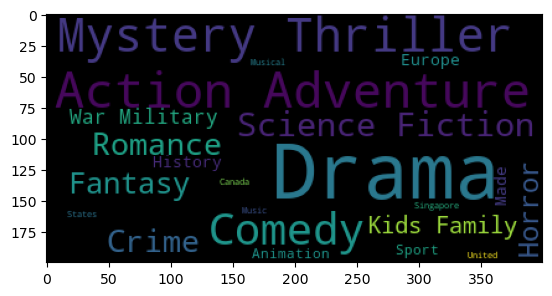

In [ ]:
#Let's Visvalize it using word cloud
plt.imshow(cloud)

In [ ]:
# TV Show
txt=" ".join(genres for genres in Tv_df['Genres'])
txt

'War & Military, Drama, History Drama, History, Romance Drama, Science-Fiction, War & Military, Action & Adventure, Mystery & Thriller Comedy, Drama Crime, Action & Adventure, Drama, Mystery & Thriller Action & Adventure, Drama, Fantasy, Science-Fiction Science-Fiction, Mystery & Thriller, Drama, Fantasy Comedy, Crime, Drama, Fantasy, Horror, Action & Adventure, Mystery & Thriller, Science-Fiction Drama, Comedy Drama, Mystery & Thriller, Action & Adventure, Crime Kids & Family, Comedy Animation, Action & Adventure, Drama, Fantasy, Horror, Science-Fiction Action & Adventure, Drama, Science-Fiction, Mystery & Thriller, Horror Horror, Mystery & Thriller, Action & Adventure, Drama Comedy, Crime Crime, Drama, Mystery & Thriller Comedy Crime, Science-Fiction, Drama, Fantasy Crime, Drama, Mystery & Thriller Drama, History, Mystery & Thriller Drama, Fantasy, Comedy Action & Adventure, Fantasy, Animation, Science-Fiction Mystery & Thriller, Crime, Drama Comedy, Drama, Kids & Family Crime, Actio

In [ ]:
cloud=wc().generate(txt)

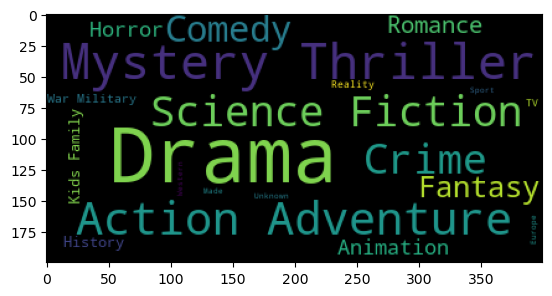

In [ ]:
plt.imshow(cloud)

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
text=" ".join(genres for genres in df_movie['Streaming Service'])
txt=" ".join(genres for genres in Tv_df['Streaming Service'])
# Cloud for Movies
cloud1=wc().generate(text)
# Cloud for TV show
cloud2=wc().generate(txt)

AxesImage(size=(200, 400))


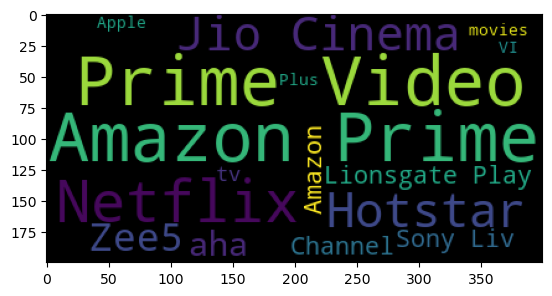

In [ ]:
#Let's Visvalize it using word cloud Movies
print(plt.imshow(cloud1))

AxesImage(size=(200, 400))


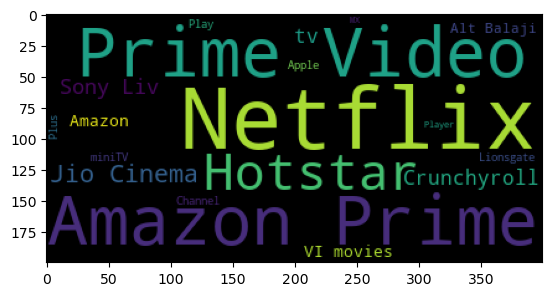

In [ ]:
#Let's Visvalize it using word cloud TV Shows
print(plt.imshow(cloud2))

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
df_movies_raw.to_csv('Movies_Raw_Data.csv')
df_Tv_raw.to_csv('TV_Shows_Raw_Data.csv')

In [ ]:
#saving filter data as Filter Data in csv format
df_movie.to_csv('Final_Movies_Data.csv')
Tv_df.to_csv('Final_TV_Shows_Data.csv')

# **Dataset Drive Link (View Access with Anyone) -
movies raw data link
https://drive.google.com/file/d/1Pg3zrHXjlZFuo5Qhdgb0gD_e0NZkF320/view?usp=sharing

show raw data link
https://drive.google.com/file/d/1b5X_Y31z0mvrIzvpElO_H3mieW-BMxzA/view?usp=sharing

Google collab project final file link
https://drive.google.com/file/d/1DK5fB0MCsDyymaZf7pKay1rD7E2QWRX5/view?usp=sharing

Final movies data
https://drive.google.com/file/d/1rNrT3xB4folhmmJo0m-V_j351EmEIeID/view?usp=sharing

Final Tv shows data
https://drive.google.com/file/d/10DXRI7ckBeCB1b96a5a3--NvX9fGfAmo/view?usp=sharing

**

# ***Congratulations!!! You have completed your Assignment.***